## business task : Predict user rating of a book


## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## import dataset

In [2]:
data = pd.read_csv("B:/DATA ANALYTICS/COURSE 8/track 2/bestsellers with categories.csv")

In [3]:
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Exploratory Data Analysis(EDA)

In [4]:
print(data.shape)

(550, 7)


In [5]:
print("unique values in dataset.")
print(data.nunique())

unique values in dataset.
Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64


In [6]:
print("duplicated values in dataset-")
print(data.duplicated().sum())

duplicated values in dataset-
0


In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
Name           550 non-null object
Author         550 non-null object
User Rating    550 non-null float64
Reviews        550 non-null int64
Price          550 non-null int64
Year           550 non-null int64
Genre          550 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB
None


In [8]:
print(data.describe())

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


In [9]:
print("correlation between features:")
data.corr()

correlation between features:


,User Rating,Reviews,Price,Year
User Rating,1.000000,-0.001729,-0.133086,0.242383
Reviews,-0.001729,1.000000,-0.109182,0.263560
Price,-0.133086,-0.109182,1.000000,-0.153979
Year,0.242383,0.263560,-0.153979,1.000000


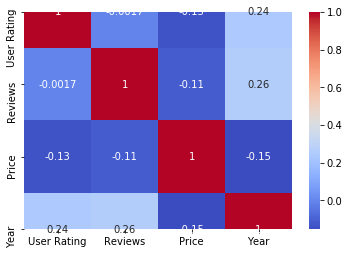

In [10]:
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

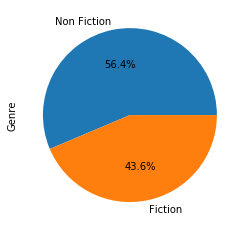

In [11]:
data["Genre"].value_counts().plot.pie(autopct='%.1f%%')
data["Genre"].value_counts()

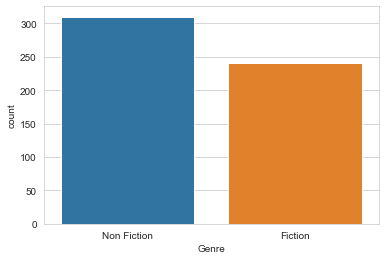

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Genre',data=data)

###### observed that non-fiction books are 310 while fiction books are 240. 

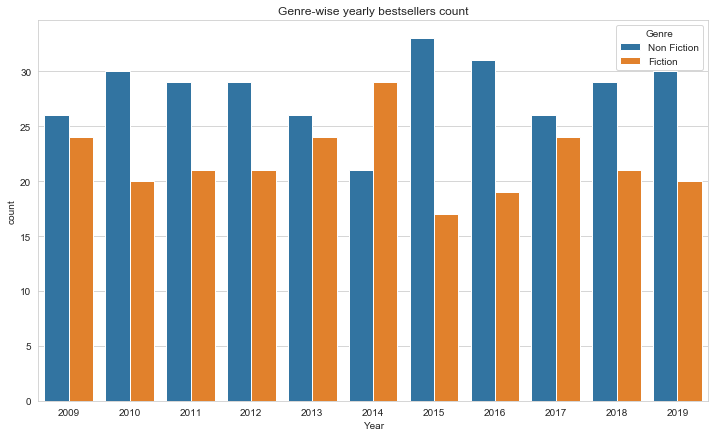

In [13]:
plt.figure(figsize=(12,7))
sns.countplot(data['Year'],hue=data['Genre'])
plt.title("Genre-wise yearly bestsellers count")
plt.show()

##### observed that non-fiction books are more bestseller than fiction, except in year 2014.  

In [14]:
print(data.describe())

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


#### Above summary statistics shows that, max user rating is 4.9 while average user rating is 4.6. 

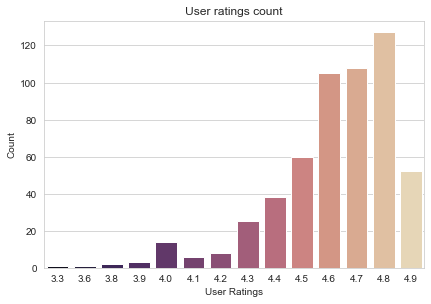

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(221)
fund=sns.countplot(data['User Rating'], palette="magma",saturation=0.50)
fund.set_xticklabels(fund.get_xticklabels(),fontsize=10)
plt.title("User ratings count")
plt.xlabel("User Ratings")
plt.ylabel("Count")
plt.show()

In [16]:
auth = dict(data["Author"].value_counts())
b=list(auth.items())
print(b[:10])

[('Jeff Kinney', 12), ('Rick Riordan', 11), ('Suzanne Collins', 11), ('Gary Chapman', 11), ('American Psychological Association', 10), ('Gallup', 9), ('Dr. Seuss', 9), ('Rob Elliott', 8), ("Bill O'Reilly", 7), ('Stephenie Meyer', 7)]


In [17]:
max_rating = data[data["User Rating"]==4.9]
auth_max = max_rating.groupby(["Author"]).size().reset_index(name="Count")
auth_max.sort_values(by="Count",ascending=False).head(20)

,Author,Count
5,Dr. Seuss,8
4,Dav Pilkey,7
7,Eric Carle,7
18,Sarah Young,6
6,Emily Winfield Martin,4
9,J.K. Rowling,3
19,Sherri Duskey Rinker,2
17,Rush Limbaugh,2
1,Bill Martin Jr.,2
13,Mark R. Levin,1


##### Above authors got the user rating 4.9 for their books. 

In [18]:
print(data[data["Reviews"]==data["Reviews"].max()])

                        Name       Author  User Rating  Reviews  Price  Year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       Genre  
534  Fiction  


##### 'Where the crawdads sing' this book has maximum reviews. 

In [19]:
max_rating[max_rating["Reviews"]==max_rating["Reviews"].max()]

,Name,Author,User Rating,Reviews,Price,Year,Genre
245,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2012,Fiction
246,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2013,Fiction
247,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2014,Fiction
248,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2015,Fiction
249,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2016,Fiction
250,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2017,Fiction
251,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2018,Fiction
252,"Oh, the Places You'll Go!",Dr. Seuss,4.9,21834,8,2019,Fiction


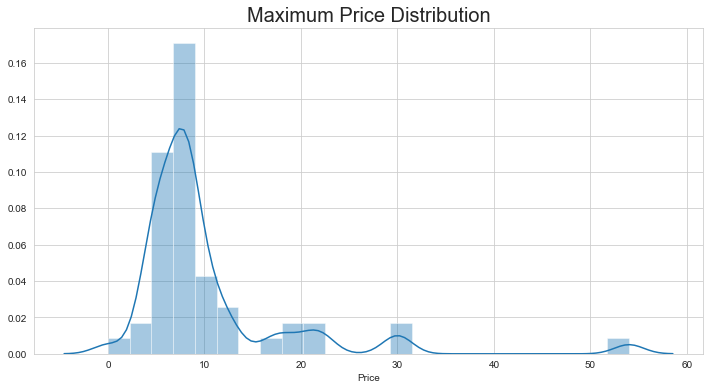

0    8
dtype: int64

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(max_rating["Price"])
plt.title("Maximum Price Distribution", fontsize=20)
plt.show()
max_rating['Price'].mode()

In [21]:
from wordcloud import WordCloud, STOPWORDS

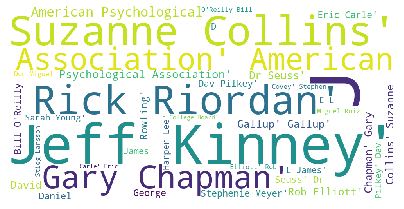

In [22]:
imp_words = data['Author'].to_list()

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'White', min_font_size = 15).generate(str(imp_words))
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

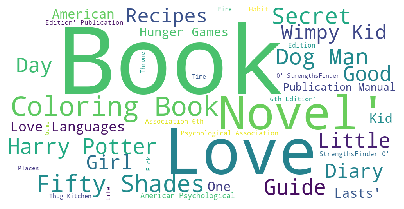

In [23]:
imp_words = data['Name'].to_list()

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'White', min_font_size = 15).generate(str(imp_words))
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
#pip install autoviz
#pip install xlrd

In [25]:
import autoviz

In [26]:
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.83. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


In [27]:
av = AutoViz_Class()

Shape of your Data Set loaded: (550, 7)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  1
    Number of Date Time Columns =  1
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    7 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables


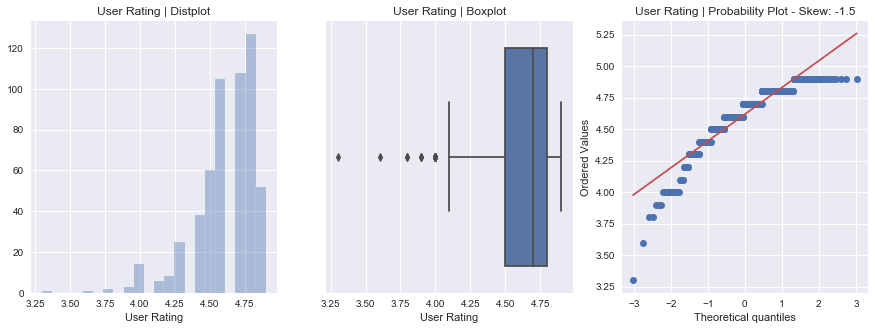

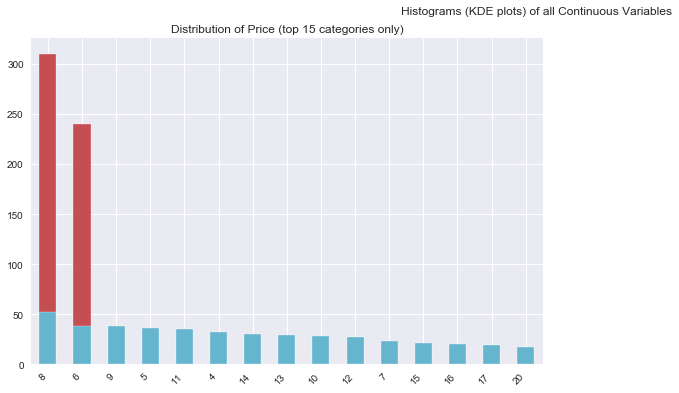

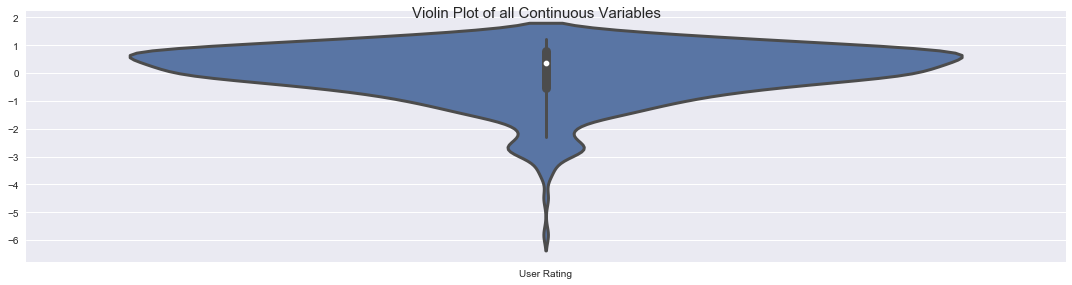

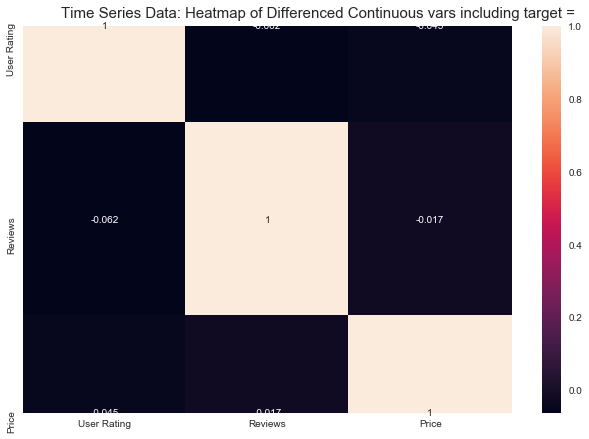

<Figure size 1080x0 with 0 Axes>

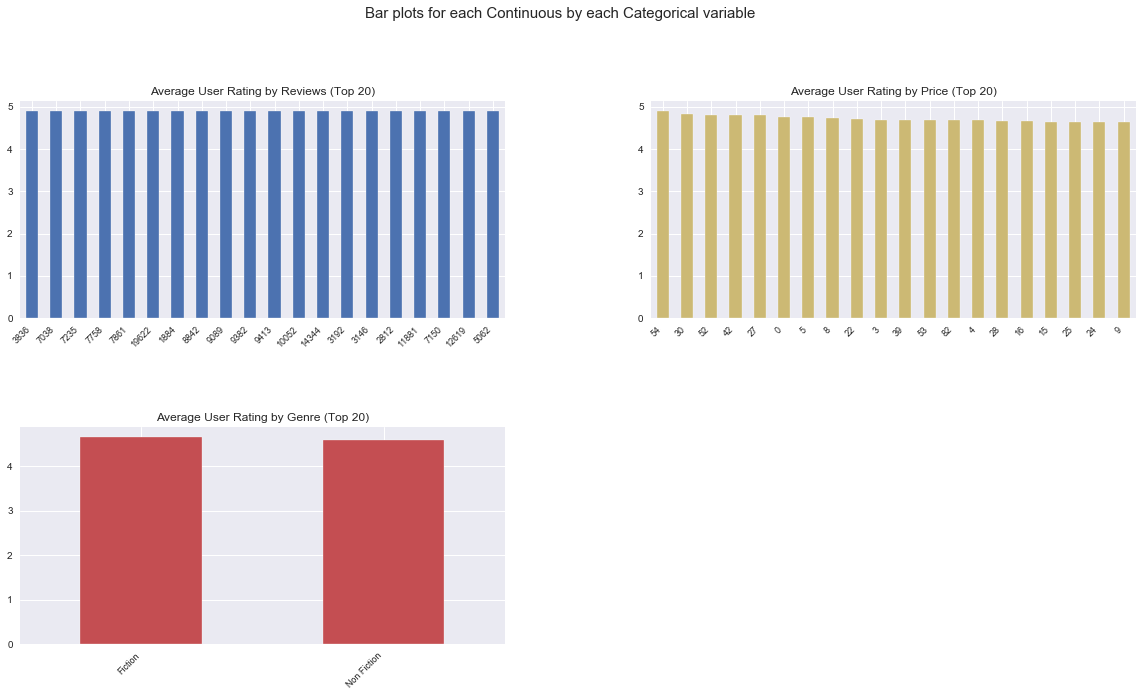

Time to run AutoViz (in seconds) = 3.862

 ###################### VISUALIZATION Completed ########################


In [28]:
autoviz_eda = av.AutoViz("B:/DATA ANALYTICS/COURSE 8/track 2/bestsellers with categories.csv", verbose=0)

## Predicting a user rating of book 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [30]:
LE=LabelEncoder()

In [32]:
LE.fit(data['Genre'])
data['Genre']= LE.transform(data['Genre'])
data.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,1


In [34]:
cols = ['Reviews', 'Price', 'Year', 'Genre']
X = data.iloc[:,3:8].values
y = data[['User Rating']]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42)

#### Using Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
prediction = model.predict(X_test)

In [39]:
prediction.shape

(110, 1)

In [41]:
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test,prediction)))

RMSE: 0.22955784515261424


#### Using Random Forest

In [43]:
from sklearn.ensemble import RandomForestRegressor
m1 = RandomForestRegressor()
m1.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [44]:
prediction = m1.predict(X_test)

In [45]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,prediction)) )

RMSE:  0.21281660905791416


##### Using Gradient Boosting 

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
m2 = GradientBoostingRegressor()
m2.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
prediction = m2.predict(X_test)

In [48]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,prediction)) )

RMSE:  0.20999067200626656


#### Using Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=11).fit(X_train,y_train)

In [51]:
prediction=dt.predict(X_test)

In [52]:
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,prediction)) )

RMSE:  0.285906067488821


So According to RMSE, Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.(Source Google)

We can see that Decision Tree was the worst model among Linear and Others in Predicting Reviews though linear regression has done quiet good work but still Gradient Boosting and Random Forest Have very much low RMSE value shows that it better predicts the Reviews than both of the above
But we can still improve the result by removing Outliers